## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE 239AS, Winter Quarter 2018, Prof. J.C. Kao, TAs C. Zhang and T. Xing

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# x = np.arange(0,3*np.pi, 0.1)
# y = np.sin(x)

# plt.plot(x, y, label = 'Sine')
# plt.xlabel('x axis label')
# plt.ylabel('y axis label')
# plt.title('Sine')
# plt.legend()
# plt.grid()
# plt.show()

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0,0.5,'$y$')

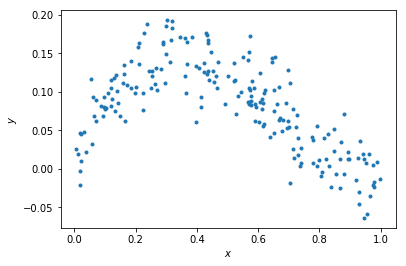

In [2]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) Uniform distribution.

(2) Normal(Gaussian) distribution with a mean of 0, standard deviation of 0.03, and the output shape of num_train samples.

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [3]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))
# print(xhat.T)
# ==================== #
# START YOUR CODE HERE #
# ==================== #
# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]

theta = np.zeros(2) # please modify this line
theta = np.linalg.lstsq(xhat.T, y)[0]
print(theta)


# theta = (a, b)
# ================== #
# END YOUR CODE HERE #
# ================== #

[-0.10599633  0.13315817]


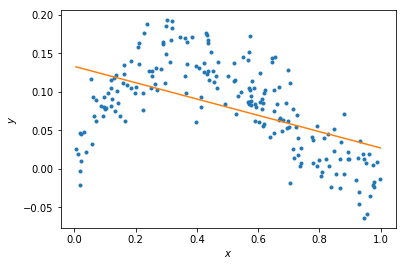

In [4]:
# Plot the data and your model fit.

f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

plt.show()

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) The linear model is underfitting the data.

(2) Need to change the model to a polynomial model, eg. a quadratic function.

### Fitting data to the model (10 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [5]:

N = 5
xhats = []
thetas = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.


thetas.append(theta)
xhat = np.vstack((x, np.ones_like(x)))
# xhats.append(xhat)
for degree in range(2,N+1):
    xhat = np.vstack((x**degree, xhat))
    new_theta = np.linalg.lstsq(xhat.T, y)[0]
    thetas.append(new_theta)
#     xhats.append(xhat)
print(thetas)
pass


# ================== #
# END YOUR CODE HERE #
# ================== #

[array([-0.10599633,  0.13315817]), array([-0.48023061,  0.36743967,  0.05521084]), array([ 0.8843808 , -1.82077417,  0.91178032,  0.00979068]), array([ 0.14080037,  0.60466289, -1.64250929,  0.87250485,  0.01175321]), array([ 0.52432591, -1.164568  ,  1.76052438, -2.07430275,  0.93373916,
        0.009716  ])]


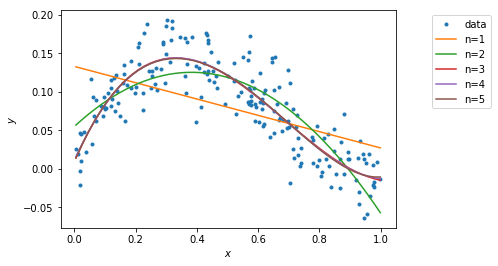

In [6]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)
# print(plot_xs)
for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (10 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [7]:
training_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.

for i in np.arange(N):
    theta_ = thetas[i]
    error = sum((np.dot(theta_, xhat[-(i+2):, :])-y)**2)/x.size
    training_errors.append(error)
pass

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Training errors are: \n', training_errors)

Training errors are: 
 [0.0023799610883627016, 0.0010924922209268528, 0.00081696038011053683, 0.0008165353735296978, 0.00081614791955252996]


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) The polynomial model of order 5 has the best training error.

(2) It is because the model with high capacity can solve complex tasks, so that the regression line will be more approaching to true points. Therefore the training error will be decreasing as the order increases.

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0,0.5,'$y$')

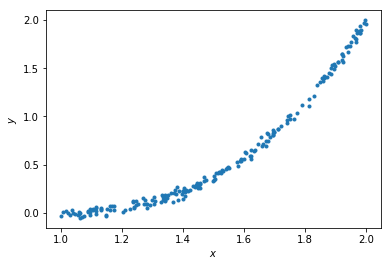

In [8]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [9]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

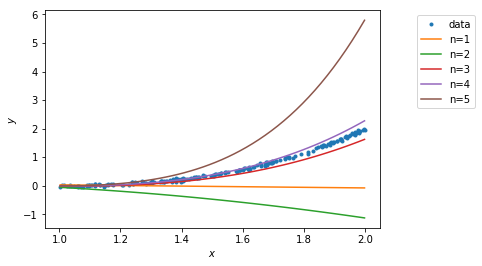

In [10]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [11]:
testing_errors = []

# ==================== #
# START YOUR CODE HERE #
# ==================== #

# GOAL: create a variable testing_errors, a list of 5 elements,
# where testing_errors[i] are the testing loss for the polynomial fit of order i+1.
for i in np.arange(N):
    theta_ = thetas[i]
    error = sum((np.dot(theta_, xhat[-(i+2):, :])-y)**2)/x.size
    testing_errors.append(error)
pass

# ================== #
# END YOUR CODE HERE #
# ================== #

print ('Testing errors are: \n', testing_errors)

Testing errors are: 
 [0.80861651845505844, 2.1319192445058217, 0.031256971083404202, 0.011870765198475226, 2.1491021807250208]


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) The polynomial with the order 4 has the best tesing error.

(2) A polynomial model of degree 5 suffers from overfitting. It has too many parameters for the actual structure so that it focuses too much on the training data themselves but not generalization.